<a href="https://colab.research.google.com/github/sirideva4/covid-19/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries needed

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
print("libraries are imported")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


libraries are imported


## Import each dataset and preprocess each dataset.

*   dataset 1 - time series of number of cases in each country.



In [ ]:
corona_cases=pd.read_csv("/content/drive/My Drive/corona_data/covid_19/time_series_covid19_confirmed_global.csv")
corona_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,06-01-2020,06-02-2020,06-03-2020,06-04-2020,06-05-2020,06-06-2020,06-07-2020,06-08-2020,06-09-2020,06-10-2020,06-11-2020,06-12-2020,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212


In [ ]:
corona_cases=corona_cases.drop("Province/State",axis=1)
corona_cases=corona_cases.set_index("Country/Region")
corona_cases=corona_cases.groupby("Country/Region").sum()
corona_cases.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,06-01-2020,06-02-2020,06-03-2020,06-04-2020,06-05-2020,06-06-2020,06-07-2020,06-08-2020,06-09-2020,06-10-2020,06-11-2020,06-12-2020,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212


In [ ]:
corona_cases.columns

Index(['Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20',
       ...
       '6/16/20', '6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20',
       '6/22/20', '6/23/20', '6/24/20', '6/25/20'],
      dtype='object', length=158)

In [ ]:
corona_cases.loc['Albania']

Lat          41.1533
Long         20.1683
1/22/20       0.0000
1/23/20       0.0000
1/24/20       0.0000
             ...    
6/21/20    1962.0000
6/22/20    1995.0000
6/23/20    2047.0000
6/24/20    2114.0000
6/25/20    2192.0000
Name: Albania, Length: 158, dtype: float64



*   Dataset 2 - time series of number of deaths.




In [ ]:
corona_death=pd.read_csv("/content/drive/My Drive/corona_data/covid_19/time_series_covid19_deaths_global.csv")
corona_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,06-01-2020,06-02-2020,06-03-2020,06-04-2020,06-05-2020,06-06-2020,06-07-2020,06-08-2020,06-09-2020,06-10-2020,06-11-2020,06-12-2020,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7,8,8,9,9,10,10,10,10


We drop Province/State because it is not relaventand Lat and long beacause these columns are already present in corona_cases. 

In [ ]:
corona_death=corona_death.drop(["Province/State","Lat","Long"],axis=1)
corona_death=corona_death.set_index("Country/Region")
corona_death=corona_death.groupby("Country/Region").sum()
#corona_death['Total']=corona_death.sum(axis=1)
corona_death.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,03-01-2020,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,06-01-2020,06-02-2020,06-03-2020,06-04-2020,06-05-2020,06-06-2020,06-07-2020,06-08-2020,06-09-2020,06-10-2020,06-11-2020,06-12-2020,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7,8,8,9,9,10,10,10,10




*   Dataset 3 - time series of number of recovered cases.



In [ ]:
corona_rec= pd.read_csv("/content/drive/My Drive/corona_data/covid_19/time_series_covid19_recovered_global.csv")
corona_rec.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,06-01-2020,06-02-2020,06-03-2020,06-04-2020,06-05-2020,06-06-2020,06-07-2020,06-08-2020,06-09-2020,06-10-2020,06-11-2020,06-12-2020,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174.0
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250.0
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920.0
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780,781,781,781,789,789,791,792,792,792,792,796,797,797,797.0
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41,42,61,61,64,64,64,64,66,66,77,77,77,77,81.0


In [ ]:
corona_rec=corona_rec.drop(["Province/State","Lat","Long"],axis=1)
corona_rec=corona_rec.set_index("Country/Region")
corona_rec=corona_rec.groupby("Country/Region").sum()
corona_rec=corona_rec.drop('-51.7963')
corona_rec.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,03-01-2020,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,06-01-2020,06-02-2020,06-03-2020,06-04-2020,06-05-2020,06-06-2020,06-07-2020,06-08-2020,06-09-2020,06-10-2020,06-11-2020,06-12-2020,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174.0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250.0
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920.0
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780,781,781,781,789,789,791,792,792,792,792,796,797,797,797.0
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41,42,61,61,64,64,64,64,66,66,77,77,77,77,81.0


No handles with labels found to put in legend.


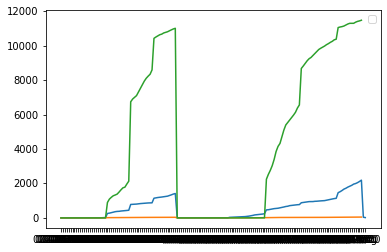

In [ ]:
sns.lineplot(data=corona_cases.loc['Albania'])
sns.lineplot(data=corona_death.loc['Albania'])
sns.lineplot(data=corona_rec.loc['Greenland'])
plt.legend()

The index is set to country as all the datasets have this column and it makes it easier to merge.


*   Dataset 4 - Health systems in each country.



In [ ]:
health=pd.read_csv("/content/drive/My Drive/corona_data/covid_19/datasets_576063_1044918_2.12_Health_systems.csv")
health.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


In [ ]:
health.columns=["Country/Region","Province/State","World_Bank_Name","gdp_exp","public_exp","pocket_exp","exp_pre_capita","ppp_exp","ext_exp","physicians","nurse","surgeons","complete_birth_reg","complete_death_reg"]
health.head()

,Country/Region,Province/State,World_Bank_Name,gdp_exp,public_exp,pocket_exp,exp_pre_capita,ppp_exp,ext_exp,physicians,nurse,surgeons,complete_birth_reg,complete_death_reg
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


In [ ]:
health=health.drop(["Province/State","World_Bank_Name","gdp_exp","ppp_exp","ext_exp","complete_birth_reg","complete_death_reg"],axis=1)

health.head()

,Country/Region,public_exp,pocket_exp,exp_pre_capita,physicians,nurse,surgeons
0,Afghanistan,5.1,77.4,57.2,0.3,0.3,0.0
1,Albania,41.4,58.0,271.5,1.2,3.6,11.6
2,Algeria,67.7,30.9,260.4,1.8,2.2,12.1
3,Andorra,49.1,41.7,3834.7,3.3,4.0,83.1
4,Angola,44.1,35.2,95.2,0.2,1.3,NaN


after dropping columns

*   public exp -Share of current health expenditures funded from domestic public sources for health. They do not include external resources spent by governments on health. 
*   pocket_exp - Share of out-of-pocket payments of total current health expenditures. Out-of-pocket payments are spending on health directly out-of-pocket by households.
*   exp_per_capita-expenditure per capita of the country. To determine how much the government dedicates towards healthcare.
*   physicians - Physicians include generalist and specialist medical practitioners pwer 1000 people.
*   nurse - Nurses include professional nurses, professional midwives, auxiliary nurses, auxiliary midwives, enrolled nurses, enrolled midwives and other associated personnel, such as dental nurses and primary care nurses per 1000 people.
*   surgeons - Specialist surgical workforce is the number of specialist surgical, anaesthetic, and obstetric (SAO) providers who are working in each country per 100,000 population.






In [ ]:
health=health.set_index("Country/Region")
health['exp_pre_capita']=(health['exp_pre_capita']-health['exp_pre_capita'].min())/(health['exp_pre_capita'].max()-health['exp_pre_capita'].min())
health.head()

,public_exp,pocket_exp,exp_pre_capita,physicians,nurse,surgeons
Country/Region,,,,,,
Afghanistan,5.1,77.4,0.004141,0.3,0.3,0.0
Albania,41.4,58.0,0.025890,1.2,3.6,11.6
Algeria,67.7,30.9,0.024763,1.8,2.2,12.1
Andorra,49.1,41.7,0.387515,3.3,4.0,83.1
Angola,44.1,35.2,0.007997,0.2,1.3,NaN


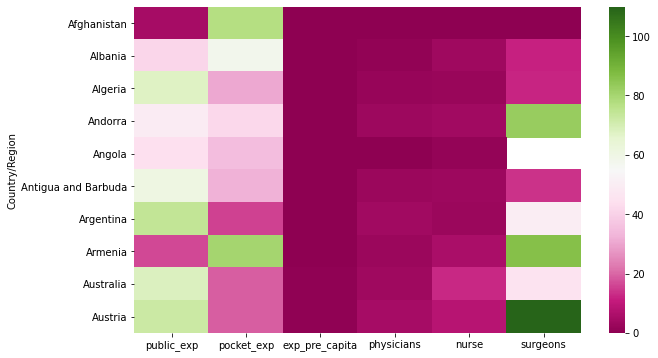

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(health.iloc[0:10],cmap='PiYG')



*   Dataset 5 - country and their lockdown dates.



In [ ]:
lock_dates=pd.read_csv("/content/drive/My Drive/corona_data/covid_19/datasets_577109_1061927_countryLockdowndates.csv")
lock_dates.head()

,Country/Region,Province,Date,Type,Reference
0,Afghanistan,NaN,24-03-2020,Full,https://www.thestatesman.com/world/afghan-govt...
1,Albania,NaN,08-03-2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
2,Algeria,NaN,24-03-2020,Full,https://www.garda.com/crisis24/news-alerts/325...
3,Andorra,NaN,16-03-2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
4,Angola,NaN,24-03-2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...


In [ ]:
lock_dates=lock_dates.drop(["Province","Reference"],axis=1)
lock_dates=lock_dates.set_index("Country/Region")
lock_dates.columns=["Lockdown startdate","type"]
lock_dates.head()

,Lockdown startdate,type
Country/Region,,
Afghanistan,24-03-2020,Full
Albania,08-03-2020,Full
Algeria,24-03-2020,Full
Andorra,16-03-2020,Full
Angola,24-03-2020,Full




*   Dataset 6 - Food supply quantity data in each country. Based on this data we can find what kind of data the people of that country prefer to eat.



In [ ]:
food=pd.read_csv("/content/drive/My Drive/corona_data/covid_19/datasets_618335_1272299_Fat_Supply_Quantity_Data.csv")
food.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0,0.0,0.7513,28.3684,17.0831,0.3593,4.5,29.8,0.075793,0.001527,0.023038,0.051228,38042000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0,0.0,0.9181,17.9998,9.2443,0.6503,22.3,6.2,0.068649,0.001540,0.039678,0.027432,2858000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0,0.0,0.8595,35.5857,27.3606,0.5145,26.6,3.9,0.027118,0.001947,0.019403,0.005769,43406000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0,0.0,0.0308,34.7010,22.4638,0.1231,6.8,25,0.000582,0.000029,0.000245,0.000309,31427000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.3591,0.0449,1.0549,0.0,0.0,0.2020,22.2995,14.4436,0.2469,19.1,NaN,0.026804,0.003093,0.022680,0.001031,97000.0,%


Instead of so many columns we can combine them into five categories namely

1.   Vegetables and legumes
2.   Fruit
2.   Grain
1.   Lean meats -poultry,fish,eggs and nuts 
2.   Reduced fats-milk,yogurt,cheese



In [ ]:
food.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

In [ ]:
food['Lean meat']=food['Eggs']+food['Fish, Seafood']+food['Meat']+food['Treenuts']+food['Animal Products']+food['Offals']
food['Vegetables and Legumes']=food['Pulses']+food['Starchy Roots']+food['Vegetables']+food['Vegetal Products']
food['Grain']=food['Cereals - Excluding Beer']+food['Sugar Crops']
food['Reduced fats']=food['Animal fats']+food['Milk - Excluding Butter']
food=food.drop(['Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood',  'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],axis=1)

In [ ]:
food.columns=['Country/Region','Fruits','Spices','Obesity','Undernourished','Lean meat','Vegetables and legumes','Grain','Reduced fats']
food=food.set_index("Country/Region")
food.head()

,Fruits,Spices,Obesity,Undernourished,Lean meat,Vegetables and legumes,Grain,Reduced fats
Country/Region,,,,,,,,
Afghanistan,0.4246,0.2776,4.5,29.8,29.5443,28.9727,8.0353,14.5027
Albania,0.6418,0.0000,22.3,6.2,43.7437,18.8159,2.6734,21.1748
Algeria,0.5772,0.1568,26.6,3.9,20.6977,36.4829,4.2035,8.9906
Angola,0.3488,0.0103,6.8,25,28.0850,35.8601,6.5545,2.5439
Antigua and Barbuda,1.2177,0.3591,19.1,NaN,44.2737,22.6586,3.2153,11.3293


dataset 7 - happiness index of all countries worldwide.

In [ ]:
happy=pd.read_csv("/content/drive/My Drive/corona_data/covid_19/datasets_894_813759_2019.csv")
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
happy= happy.drop(["Generosity","Perceptions of corruption","Healthy life expectancy","Social support"],axis=1)


In [ ]:
happy.columns=["Overall rank","Country/Region","Happiness Score","GDP per capita","Freedom to make life choices"]
happy=happy.set_index("Country/Region")
happy.head()

,Overall rank,Happiness Score,GDP per capita,Freedom to make life choices
Country/Region,,,,
Finland,1,7.769,1.340,0.596
Denmark,2,7.600,1.383,0.592
Norway,3,7.554,1.488,0.603
Iceland,4,7.494,1.380,0.591
Netherlands,5,7.488,1.396,0.557


## Visualizing the datasets
To visualize the data we find a numeric value which will describe the spread of the virus. We can find the infection rate by calculating the first derivative of the curve which will tell us the infection rate in the country.

[The orange chloropleth map represents the infection rate in each country.](https://colab.research.google.com/drive/1gNmmg_d_Hx_KxAC9NX10nR-q47Xo8DAI#scrollTo=FWPlyVUK3WUs&line=6&uniqifier=1)

[The blue chloropleth map represents total number of cases in each country](https://colab.research.google.com/drive/1gNmmg_d_Hx_KxAC9NX10nR-q47Xo8DAI#scrollTo=cEV5A3Rt7XFf&line=12&uniqifier=1)

[The red chloropleth map represents the total death caused by the virus in each country.](https://colab.research.google.com/drive/1gNmmg_d_Hx_KxAC9NX10nR-q47Xo8DAI#scrollTo=KQma2wsv66va&line=2&uniqifier=1)

[The green chloropleth map represents the recovery rate in each country.](https://colab.research.google.com/drive/1gNmmg_d_Hx_KxAC9NX10nR-q47Xo8DAI#scrollTo=oZzYyh_NBoJ_&line=1&uniqifier=1)

In [ ]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [ ]:
world_geo = r'/content/drive/My Drive/corona_data/covid_19/world_countries.json'
world_map = folium.Map(location=[0, 0], zoom_start=2, 
                       )


In [ ]:
Countries=list(corona_cases.index)
max_infec_rates=[]
for c in Countries:
    max_infec_rates.append(corona_cases.loc[c].diff().max())
print(len(max_infec_rates))
covid_cases=pd.DataFrame()
covid_cases['Country/Region']=(Countries)
covid_cases['max_infec_rates']=max_infec_rates
covid_cases['max_infec_rates']=(covid_cases['max_infec_rates']-covid_cases['max_infec_rates'].mean())/covid_cases['max_infec_rates'].std()

189


In [ ]:
world_map.choropleth(
    geo_data=world_geo,
    data=covid_cases,
    columns=['Country/Region', 'max_infec_rates'],
    key_on='feature.properties.name',
    fill_color='Oranges', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='infection rates'
)

# display map
world_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
Countries=list(corona_cases.index)
Total_cases=[]
for c in Countries:
    Total_cases.append(corona_cases.loc[c].sum())
print(len(Total_cases))
covid_cases=pd.DataFrame()
covid_cases['Country/Region']=(Countries)
covid_cases['total_cases']=Total_cases
covid_cases['total_cases']=(covid_cases['total_cases']-covid_cases['total_cases'].mean())/covid_cases['total_cases'].std()

189


In [ ]:

cases=folium.Map(location=[0,0],zoom_start=2)
cases.choropleth(
    geo_data=world_geo,
    data=covid_cases,
    columns=['Country/Region', 'total_cases'],
    key_on='feature.properties.name',
    fill_color='Blues', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total cases'
)

# display map
cases

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
Countries=list(corona_death.index)
max_death_rates=[]
for c in Countries:
    max_death_rates.append(corona_death.loc[c].sum())
print(len(max_death_rates))
covid_death=pd.DataFrame()
covid_death['Country/Region']=(Countries)
covid_death['Total deaths']=max_death_rates
covid_death['Total deaths']=(covid_death['Total deaths']-covid_death['Total deaths'].mean())/covid_death['Total deaths'].std()
covid_death.shape

189


(189, 2)

In [ ]:
death=folium.Map(location=[0,0],zoom_start=2)
death.choropleth(
    geo_data=world_geo,
    data=covid_death,
    columns=['Country/Region', 'Total deaths'],
    key_on='feature.properties.name',
    fill_color='Reds', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total deaths'
)
# display map
death

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
Countries=list(corona_rec.index)
max_rec_rates=[]
for c in Countries:
    max_rec_rates.append(corona_rec.loc[c].diff().max())
print(len(max_rec_rates))
covid_rec=pd.DataFrame()
covid_rec['Country/Region']=(Countries)
covid_rec['Total recoveries']=max_rec_rates
covid_rec.drop(0)
covid_rec['Total recoveries']=(covid_rec['Total recoveries']-covid_rec['Total recoveries'].mean())/covid_rec['Total recoveries'].std()
covid_rec.head()

189


,Country/Region,Total recoveries
0,Afghanistan,-0.084884
1,Albania,-0.254174
2,Algeria,-0.216990
3,Andorra,-0.251749
4,Angola,-0.256137


In [ ]:
rec=folium.Map(location=[0,0],zoom_start=2,tiles="Stamen Terrain")
rec.choropleth(
    geo_data=world_geo,
    data=covid_rec,
    columns=['Country/Region', 'Total recoveries'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.8, 
    line_opacity=0.2,
    legend_name='Total rec'
)
# display map
rec

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## Merging relevent factors
To find correlations between the four factors taken 

*   Happiness index
*   Food habits
*   Health services
*   Lockdown start dates

We have four measures 

*   Maximum infection rate
*   Total cases
*   Total deaths
*   Maximum recovery rate

for each of these measures there are four factors.We need to find out how they are correlated.



First we should merge the dataframes to find correlations
as we cannot merge the entire table we will find the column most relevent for us and merge those columns only.

infection rate depends on when the country locked down adn immunity of it's people.

Immunity is boosted by fruits and vegetables and spices like ginger and turmeric. So, we will concentrate on these attributes.

Studies have shown that if we are positive there will likely be a positive outcome.So Happiness score will be considered.

To treat covid-19 there is no strict protocol, patients have to be kept in isolation to decrease the risk of infection. This needs a lot of infrastructure and staff. We will combine all the physicians, nurses and surgeons into one column called medical_staff. This column and exp_pre_capita will be taken into consideration.

First we chack the shape of all datasets.

In [ ]:
print(len(corona_cases.index))
print(food.shape)
print(health.shape)
print(lock_dates.shape)
print(health.shape)
print(happy.shape)

189
(170, 8)
(210, 6)
(307, 2)
(210, 6)
(156, 4)


The lowest number is 156 in food dataset. So we will merge according to these countries and only take these countries into consideration in this notebook.

WE should merge phyisicians, nurses and surgeons.

In [ ]:
health['medical staff']=health['nurse']+health['physicians']+health['surgeons']
health.head()

,public_exp,pocket_exp,exp_pre_capita,physicians,nurse,surgeons,medical staff
Country/Region,,,,,,,
Afghanistan,5.1,77.4,0.004141,0.3,0.3,0.0,0.6
Albania,41.4,58.0,0.025890,1.2,3.6,11.6,16.4
Algeria,67.7,30.9,0.024763,1.8,2.2,12.1,16.1
Andorra,49.1,41.7,0.387515,3.3,4.0,83.1,90.4
Angola,44.1,35.2,0.007997,0.2,1.3,NaN,NaN


In [ ]:
food.head()

,Fruits,Spices,Obesity,Undernourished,Lean meat,Vegetables and legumes,Grain,Reduced fats
Country/Region,,,,,,,,
Afghanistan,0.4246,0.2776,4.5,29.8,29.5443,28.9727,8.0353,14.5027
Albania,0.6418,0.0000,22.3,6.2,43.7437,18.8159,2.6734,21.1748
Algeria,0.5772,0.1568,26.6,3.9,20.6977,36.4829,4.2035,8.9906
Angola,0.3488,0.0103,6.8,25,28.0850,35.8601,6.5545,2.5439
Antigua and Barbuda,1.2177,0.3591,19.1,NaN,44.2737,22.6586,3.2153,11.3293


Now we should add the infection rate, total cases, total deaths and recovery rate.

In [ ]:
covid_rate=pd.DataFrame()
covid_rate['Country/Region']=covid_cases['Country/Region']
#covid_rate=covid_rate.set_index('Country/Region')
covid_rate['Max infection rate']=max_infec_rates
covid_rate['Total cases']=Total_cases
covid_rate['Total deaths']=max_death_rates
covid_rate['Max recovery rate']=max_rec_rates
covid_rate.head()

,Country/Region,Max infection rate,Total cases,Total deaths,Max recovery rate
0,Afghanistan,915.0000,850310.0000,17204,1502.0
1,Albania,82.0000,85676.3216,2736,36.0
2,Algeria,199.0000,557163.6935,45531,358.0
3,Andorra,79.0000,66671.0281,3759,57.0
4,Angola,29.0766,5656.6712,306,19.0


In [ ]:
#covid_happy=covid_happy.join(happy,how='inner')
#covid_happy.columns=['Total cases','max_infec_rates','Overall rank','Happiness Score','GDP per capita','Freedom to make life choices']
covid_df=pd.DataFrame(food)
covid_df.reset_index

#covid_df=covid_df(covid_rate.var(ddof=0,axis=1),how='inner')
covid_df=covid_df.join(health,how='inner')
frames=['Max infection rate','Total cases','Total deaths','Max recovery rate','Spices','Vegetables and legumes','Fruits','Happiness Score','Freedom to make life choices','exp_pre_capita','medical staff','type']
waste=set(covid_df.columns)-set(frames)
waste=list(waste)
covid_df=covid_df.drop(waste,axis=1)

covid_df=covid_df.join(happy,how='outer')
frames=['Max infection rate','Total cases','Total deaths','Max recovery rate','Spices','Vegetables and legumes','Fruits','Happiness Score','Freedom to make life choices','exp_pre_capita','medical staff','type']
waste=set(covid_df.columns)-set(frames)
waste=list(waste)
covid_df=covid_df.drop(waste,axis=1)

covid_df=covid_df.join(lock_dates,how='inner')
frames=['Max infection rate','Total cases','Total deaths','Max recovery rate','Spices','Vegetables and legumes','Fruits','Happiness Score','Freedom to make life choices','exp_pre_capita','medical staff','Lockdown startdate','type']
waste=set(covid_df.columns)-set(frames)
waste=list(waste)
covid_df=covid_df.drop(waste,axis=1)
covid_df=covid_df.reset_index()
covid_df.head()

,Country/Region,Fruits,Spices,Vegetables and legumes,exp_pre_capita,medical staff,Happiness Score,Freedom to make life choices,Lockdown startdate,type
0,Afghanistan,0.4246,0.2776,28.9727,0.004141,0.6,3.203,0.000,24-03-2020,Full
1,Albania,0.6418,0.0000,18.8159,0.025890,16.4,4.719,0.383,08-03-2020,Full
2,Algeria,0.5772,0.1568,36.4829,0.024763,16.1,5.211,0.086,24-03-2020,Full
3,Angola,0.3488,0.0103,35.8601,0.007997,NaN,NaN,NaN,24-03-2020,Full
4,Antigua and Barbuda,1.2177,0.3591,22.6586,0.061573,19.9,NaN,NaN,NaN,None


In [ ]:
covid_rate=pd.merge(left=covid_rate,right=covid_df,on='Country/Region')
covid=rate=covid_rate.set_index("Country/Region")
covid_rate.head()

,Country/Region,Max infection rate,Total cases,Total deaths,Max recovery rate,Fruits,Spices,Vegetables and legumes,exp_pre_capita,medical staff,Happiness Score,Freedom to make life choices,Lockdown startdate,type
0,Afghanistan,915.0000,850310.0000,17204,1502.0,0.4246,0.2776,28.9727,0.004141,0.6,3.203,0.000,24-03-2020,Full
1,Albania,82.0000,85676.3216,2736,36.0,0.6418,0.0000,18.8159,0.025890,16.4,4.719,0.383,08-03-2020,Full
2,Algeria,199.0000,557163.6935,45531,358.0,0.5772,0.1568,36.4829,0.024763,16.1,5.211,0.086,24-03-2020,Full
3,Angola,29.0766,5656.6712,306,19.0,0.3488,0.0103,35.8601,0.007997,NaN,NaN,NaN,24-03-2020,Full
4,Antigua and Barbuda,61.7964,2098.2644,230,4.0,1.2177,0.3591,22.6586,0.061573,19.9,NaN,NaN,NaN,None


In [ ]:
covid_rate=covid_rate.set_index('Country/Region')
#print(covid_rate.loc['United States'])
covid_rate.head()

,Max infection rate,Total cases,Total deaths,Max recovery rate,Fruits,Spices,Vegetables and legumes,exp_pre_capita,medical staff,Happiness Score,Freedom to make life choices,Lockdown startdate,type
Country/Region,,,,,,,,,,,,,
Afghanistan,915.0000,850310.0000,17204,1502.0,0.4246,0.2776,28.9727,0.004141,0.6,3.203,0.000,24-03-2020,Full
Albania,82.0000,85676.3216,2736,36.0,0.6418,0.0000,18.8159,0.025890,16.4,4.719,0.383,08-03-2020,Full
Algeria,199.0000,557163.6935,45531,358.0,0.5772,0.1568,36.4829,0.024763,16.1,5.211,0.086,24-03-2020,Full
Angola,29.0766,5656.6712,306,19.0,0.3488,0.0103,35.8601,0.007997,NaN,NaN,NaN,24-03-2020,Full
Antigua and Barbuda,61.7964,2098.2644,230,4.0,1.2177,0.3591,22.6586,0.061573,19.9,NaN,NaN,NaN,None


## Now that we have created our dataset we consists of all the factors, we can find the correlations between them.

.corr() is used to find the pairwise correlation of all columns in a dataframe.
Any na values are automatically excluded.
Any non-numeric data type column in the dataframe will be ignored.
The values are in the range  -1 to 1 only.
If a positive value exists then that means there is a positive linear relation between the columns taken into consideration. If the value is negative that means there is a linear relation between the columns.

In [ ]:
covid_rate.corr()

,Max infection rate,Total cases,Total deaths,Max recovery rate,Fruits,Spices,Vegetables and legumes,exp_pre_capita,medical staff,Happiness Score,Freedom to make life choices
Max infection rate,1.000000,0.841726,0.855240,0.818721,-0.158957,-0.307225,-0.505724,0.098312,0.130188,0.312896,0.081929
Total cases,0.841726,1.000000,0.962595,0.951995,-0.161046,-0.308035,-0.449381,0.245766,0.355555,0.381021,0.008001
Total deaths,0.855240,0.962595,1.000000,0.876579,-0.067085,-0.222050,-0.269697,0.408884,0.432661,0.498585,-0.018828
Max recovery rate,0.818721,0.951995,0.876579,1.000000,-0.062644,-0.073960,-0.097790,-0.027064,0.032755,0.309231,-0.007983
Fruits,-0.158957,-0.161046,-0.067085,-0.062644,1.000000,0.078731,0.242049,-0.079165,-0.139810,-0.063442,-0.010714
Spices,-0.307225,-0.308035,-0.222050,-0.073960,0.078731,1.000000,0.376570,-0.220181,-0.304463,-0.149529,-0.099835
Vegetables and legumes,-0.505724,-0.449381,-0.269697,-0.097790,0.242049,0.376570,1.000000,-0.344079,-0.483158,-0.320285,-0.426760
exp_pre_capita,0.098312,0.245766,0.408884,-0.027064,-0.079165,-0.220181,-0.344079,1.000000,0.563732,0.840651,0.408589
medical staff,0.130188,0.355555,0.432661,0.032755,-0.139810,-0.304463,-0.483158,0.563732,1.000000,0.569842,0.056234
Happiness Score,0.312896,0.381021,0.498585,0.309231,-0.063442,-0.149529,-0.320285,0.840651,0.569842,1.000000,0.353251


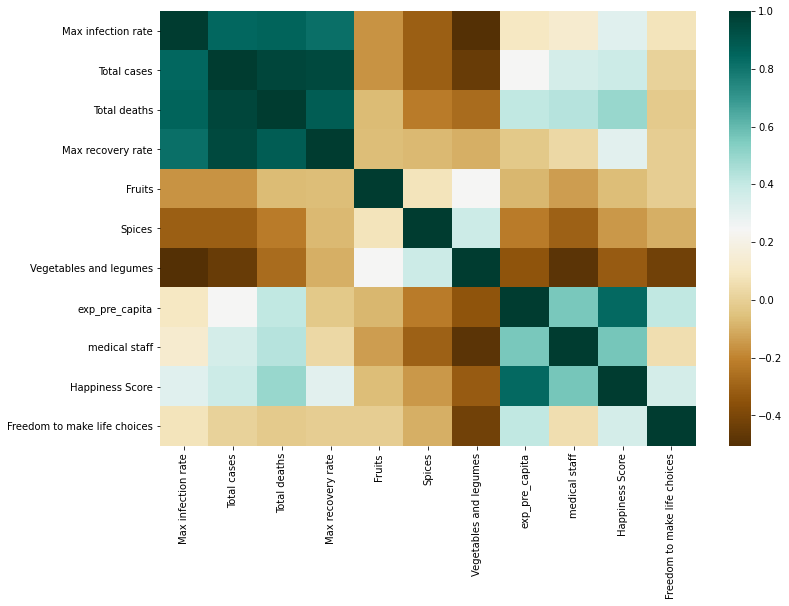

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(covid_rate.corr(),cmap='BrBG')

## Conclusions
As said earlier a correlation shows us the linear relationship between each pair of columns.
#### From the heatmap we can draw some conclusions:
1. The more infection rate, more cases are registered and proportionally more deaths due to the virus and more recoveries. 
2.   The more intake of vegetables, spices and fruits has a negative effect on number of cases, maximum infection rate and number of deaths. So, if we are healthy and have a good immune the chance of getting the virus is less.
1.   If there is less funding from the government towards medical supplies and the country is facing a shortage of medical staff there is a rise in infection rate.This is mostly because the country does not have the means to contain the spread.
2.   More funding from government and medical staff has a positive effect on people's happiness.
5.  When the citizens are responcible for their actions and have the freedom to make these choices the risk of infection and and number of cases are less.








